<a href="https://colab.research.google.com/github/mehraanjali/Predicting_the_status_of_product_in_Amazon_using_LogisticRegression/blob/main/Predicting_the_status_of_a_product_in_Amazon_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Neccessary Libraries**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Importing and Reading Data**

[DataSet From Kaggle](https://www.kaggle.com/code/jakeduckers/amazon-india-sales-dataset-eda-analysis/input)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "/content/drive/MyDrive/Amazon_Sale_Report.csv"
df = pd.read_csv(data)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Exploring Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

# **Data Cleaning**

In [ ]:
df.drop(['index','Order ID','Date','SKU','ASIN','ship-postal-code','ship-country', 'promotion-ids','Unnamed: 22'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style',
       'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df.isnull().sum()

Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
Category                  0
Size                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
B2B                       0
fulfilled-by          89698
dtype: int64

In [ ]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [ ]:
len(df['Status'].unique())

13

In [ ]:
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [ ]:
df.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
0,Cancelled,Merchant,Amazon.in,Standard,SET389,Set,S,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,False,Easy Ship
2,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN
3,Cancelled,Merchant,Amazon.in,Standard,J0341,Western Dress,L,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,False,NaN


In [ ]:
df = df[(df['Status'] == 'Cancelled') | (df['Status'] == 'Shipped') | (df['Status'] == 'Shipped - Delivered to Buyer')]
df = df[(df['Courier Status']=='Shipped') | (df['Courier Status']=='Cancelled') | (df['Courier Status']=='Unshipped')]
df.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df.isnull().sum()

Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               6049
Amount                 6049
ship-city                27
ship-state               27
B2B                       0
fulfilled-by          89275
dtype: int64

In [ ]:
df["Status"] = df.Status.map({"Cancelled":0, "Shipped" : 1, "Shipped - Delivered to Buyer":2})

<ipython-input-16-08d69bea8fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status"] = df.Status.map({"Cancelled":0, "Shipped" : 1, "Shipped - Delivered to Buyer":2})


In [ ]:
df.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [ ]:
#df["Fulfilment"] = df.Fulfilment.map({"Merchant":0, "Amazon" : 1})
#df.head()
df.drop(['Fulfilment'], axis=1, inplace=True)

In [ ]:
df['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [ ]:
df.drop(['ship-service-level','Style'], axis=1, inplace=True)
df.head()

,Status,Sales Channel,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,Amazon.in,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,Amazon.in,kurta,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,Amazon.in,Top,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,Amazon.in,Set,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,Amazon.in,Set,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df['Size'].unique()

array(['3XL', 'XL', 'L', 'S', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [ ]:
df["Size"] = df.Size.map({"XS":0, "S":1, "M":2, "L":3, "XL":4, "XXL":5, "3XL":6, "4XL":7, "5XL":8, "6XL":9, "Free":10 })
df.head()

,Status,Sales Channel,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,Amazon.in,kurta,6,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,Amazon.in,kurta,4,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,Amazon.in,Top,6,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,Amazon.in,Set,4,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,Amazon.in,Set,3,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df['Courier Status'].unique()

array(['Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [ ]:
df.rename(columns = {'Courier Status': 'Courier_Status'}, inplace = True)
df.columns

Index(['Status', 'Sales Channel ', 'Category', 'Size', 'Courier_Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df["Courier_Status"] = df.Courier_Status.map({"Shipped":0, "Cancelled":1, "Unshipped":2})
df.head()

,Status,Sales Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,Amazon.in,kurta,6,0,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,Amazon.in,kurta,4,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,Amazon.in,Top,6,0,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,Amazon.in,Set,4,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,Amazon.in,Set,3,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df.rename(columns = {'Sales Channel ': 'Sales_Channel'}, inplace = True)
df.columns

Index(['Status', 'Sales_Channel', 'Category', 'Size', 'Courier_Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df['Sales_Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [ ]:
df["Sales_Channel"] = df.Sales_Channel.map({"Amazon.in":0, "Non-Amazon":1})
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,0,kurta,6,0,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,0,kurta,4,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,0,Top,6,0,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,0,Set,4,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,0,Set,3,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df['Category'].unique()

array(['kurta', 'Top', 'Set', 'Western Dress', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [ ]:
df["Category"] = df.Category.map({"kurta":0, "Top":1, "Set":2, "Western Dress":3, "Ethnic Dress":4, "Saree":5, "Blouse":6, "Bottom":7, "Dupatta":8})
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,0,0,6,0,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,0,0,4,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,0,1,6,0,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,0,2,4,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,0,2,3,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df['Qty'].unique()

array([ 1,  0,  2, 15,  3,  9, 13,  5,  4,  8])

In [ ]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [ ]:
df['currency'] = df['currency'].fillna('Not-Paid')
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,0,0,6,0,1,INR,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,0,0,4,0,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,0,1,6,0,1,INR,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,0,2,4,0,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,0,2,3,0,1,INR,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df["currency"] = df.currency.map({"Not-Paid":0, "INR":1})
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,0,0,6,0,1,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,0,0,4,0,1,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,0,1,6,0,1,1,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,0,2,4,0,1,1,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,0,2,3,0,1,1,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
df.isnull().sum()

Status                0
Sales_Channel         0
Category              0
Size                  0
Courier_Status        0
Qty                   0
currency              0
Amount             6049
ship-city            27
ship-state           27
B2B                   0
fulfilled-by      89275
dtype: int64

In [ ]:
df['Amount'].fillna(value = 0, inplace = True)
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by
1,2,0,0,6,0,1,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,1,0,0,4,0,1,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,NaN
4,1,0,1,6,0,1,1,574.0,CHENNAI,TAMIL NADU,False,NaN
5,1,0,2,4,0,1,1,824.0,GHAZIABAD,UTTAR PRADESH,False,NaN
6,1,0,2,3,0,1,1,653.0,CHANDIGARH,CHANDIGARH,False,NaN


In [ ]:
len(df['ship-city'].unique())

8526

In [ ]:
len(df['ship-state'].unique())

69

In [ ]:
df.drop(['ship-city','ship-state'],axis=1, inplace=True)
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,B2B,fulfilled-by
1,2,0,0,6,0,1,1,406.0,False,Easy Ship
2,1,0,0,4,0,1,1,329.0,True,NaN
4,1,0,1,6,0,1,1,574.0,False,NaN
5,1,0,2,4,0,1,1,824.0,False,NaN
6,1,0,2,3,0,1,1,653.0,False,NaN


In [ ]:
df['B2B'].unique()

array([False,  True])

In [ ]:
#df["B2B"] = df.Category.map({"True":1, "False":0})
#Bool = {'True' : 0 , 'False' : 1 }
#df['B2B'] = df['B2B'].map(Bool)
#df.head()

In [ ]:
#df['B2B'].unique()

In [ ]:
df.drop(['B2B'], axis=1, inplace=True)
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,fulfilled-by
1,2,0,0,6,0,1,1,406.0,Easy Ship
2,1,0,0,4,0,1,1,329.0,NaN
4,1,0,1,6,0,1,1,574.0,NaN
5,1,0,2,4,0,1,1,824.0,NaN
6,1,0,2,3,0,1,1,653.0,NaN


In [ ]:
#there is a relationship between fulfilled by and status and merchant- every merchant has shipped - something and has a fulfilled company name
len(df['fulfilled-by'].unique())

2

In [ ]:
df.rename(columns = {'fulfilled-by': 'fulfilled_by'}, inplace = True)
df.columns

Index(['Status', 'Sales_Channel', 'Category', 'Size', 'Courier_Status', 'Qty',
       'currency', 'Amount', 'fulfilled_by'],
      dtype='object')

In [ ]:
df['fulfilled_by'] = df['fulfilled_by'].fillna('Not Easy Ship')
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,fulfilled_by
1,2,0,0,6,0,1,1,406.0,Easy Ship
2,1,0,0,4,0,1,1,329.0,Not Easy Ship
4,1,0,1,6,0,1,1,574.0,Not Easy Ship
5,1,0,2,4,0,1,1,824.0,Not Easy Ship
6,1,0,2,3,0,1,1,653.0,Not Easy Ship


In [ ]:
df["fulfilled_by"] = df.fulfilled_by.map({"Easy Ship":0, "Not Easy Ship":1})
df.head()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,fulfilled_by
1,2,0,0,6,0,1,1,406.0,0
2,1,0,0,4,0,1,1,329.0,1
4,1,0,1,6,0,1,1,574.0,1
5,1,0,2,4,0,1,1,824.0,1
6,1,0,2,3,0,1,1,653.0,1


In [ ]:
df

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,fulfilled_by
1,2,0,0,6,0,1,1,406.0,0
2,1,0,0,4,0,1,1,329.0,1
4,1,0,1,6,0,1,1,574.0,1
5,1,0,2,4,0,1,1,824.0,1
6,1,0,2,3,0,1,1,653.0,1
...,...,...,...,...,...,...,...,...,...
128970,1,0,0,4,0,1,1,517.0,1
128971,1,0,2,2,0,1,1,999.0,1
128972,1,0,3,5,0,1,1,690.0,1
128973,1,0,2,0,0,1,1,1199.0,1


In [ ]:
df = df.drop(df[df["Status"]==1].index)

# ***Split dataset into independent and dependent features***

In [ ]:
# Split dataset into independent and dependent features

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X.shape

(40232, 8)

In [ ]:
y.shape

(40232,)

# ***Splitting the dataset into the training and testing set***

In [ ]:
#splitting the dataset into the training and testing set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [ ]:
X_Train.shape

(30174, 8)

In [ ]:
X_Test.shape

(10058, 8)

In [ ]:
y_Train.shape

(30174,)

In [ ]:
y_Test.shape

(10058,)

# ***Scaling the Data***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
df.describe()

,Status,Sales_Channel,Category,Size,Courier_Status,Qty,currency,Amount,fulfilled_by
count,40232.000000,40232.000000,40232.000000,40232.000000,40232.000000,40232.000000,40232.000000,40232.000000,40232.000000
mean,1.429757,0.000025,1.395382,3.185797,0.425085,0.858595,0.854817,556.271799,0.285121
std,0.902956,0.004986,1.263339,1.888204,0.724104,0.361124,0.352290,346.942716,0.451478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,368.000000,0.000000
50%,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,1.000000,563.000000,0.000000
75%,2.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,759.000000,1.000000
max,2.000000,1.000000,7.000000,10.000000,2.000000,5.000000,1.000000,5495.000000,1.000000


# ***Model Fitting***

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, y_Train)

LogisticRegression(random_state=0)

In [ ]:
y_Pred = classifier.predict(X_Test)

***Accuracy***

In [ ]:
#Accuracy

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_Test, y_Pred)
print("Accuracy", acc*100, "%")

Accuracy 100.0 %


***Confusion Matrix***

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_Pred)
cm

array([[2887,    0],
       [   0, 7171]])

***Heat Map***

<AxesSubplot:>

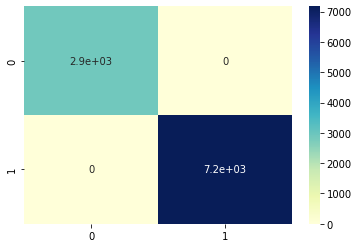

In [ ]:
#Heat MAtrix

sns.heatmap(cm, annot=True, cmap="YlGnBu")